In [12]:
import os
import numpy as np
from PIL import Image, ImageSequence
import cv2
from scipy.ndimage import median_filter
from skimage import filters
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
def load_image_stack(path):
    frames = []
    with Image.open(path) as img:
        for frame in ImageSequence.Iterator(img):
            image = np.array(frame)
            frames.append(image)
    return np.array(frames)

def denoise_image_stack(image_stack, gaussian_sigma=1.0, median_size=3):
    denoised_frames = []
    for i, image in enumerate(image_stack):
        image_min, image_max = np.min(image), np.max(image)
        image = median_filter(image, size=median_size)
        image = filters.gaussian(image, sigma=gaussian_sigma, preserve_range=True)

        image_norm = (image - image_min) / (image_max - image_min)
        image_norm = image_norm.astype(np.float32)

        height, width = image.shape[:2]
        d = max(5, min(height, width) // 50)
        sigmaColor = np.std(image_norm) * 0.15
        sigmaSpace = d * 1

        image_filtered = cv2.bilateralFilter(image_norm, d, sigmaColor, sigmaSpace)

        image_filtered = image_filtered * (image_max - image_min) + image_min
        image_filtered = np.clip(image_filtered, 0, 65535)

        out_dtype = np.uint16 if image_max > 255 else np.uint8
        final_frame = image_filtered.astype(out_dtype)
        denoised_frames.append(final_frame)

        print(f"Processed slice {i+1}/{len(image_stack)}")
    return np.array(denoised_frames)

def fuse_stack(image_stack, method='max'):
    if method == 'max':
        return np.max(image_stack, axis=0)
    elif method == 'sum':
        return np.clip(np.sum(image_stack, axis=0), 0, 65535)
    elif method == 'average':
        return np.clip(np.mean(image_stack, axis=0), 0, 65535)
    else:
        raise ValueError("Unknown fusion method. Use 'max', 'sum', or 'average'.")

In [14]:
def evaluate_fusion(fused_image, reference_image):
    ssim_value, _ = ssim(fused_image, reference_image, full=True)
    psnr_value = psnr(fused_image, reference_image)
    mse_value = mean_squared_error(fused_image.flatten(), reference_image.flatten())

    print(f"SSIM: {ssim_value:.4f}")
    print(f"PSNR: {psnr_value:.4f} dB")
    print(f"MSE: {mse_value:.4f}")

    return {
        "SSIM": ssim_value,
        "PSNR": psnr_value,
        "MSE": mse_value
    }

In [15]:
def show_side_by_side(image1, image2, title1='Image 1', title2='Image 2'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title(title1)
    axes[0].axis('off')
    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title(title2)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()


=== Processing Image 169 (nucleus) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pro

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.8720
PSNR: 25.9488 dB
MSE: 29414.2596


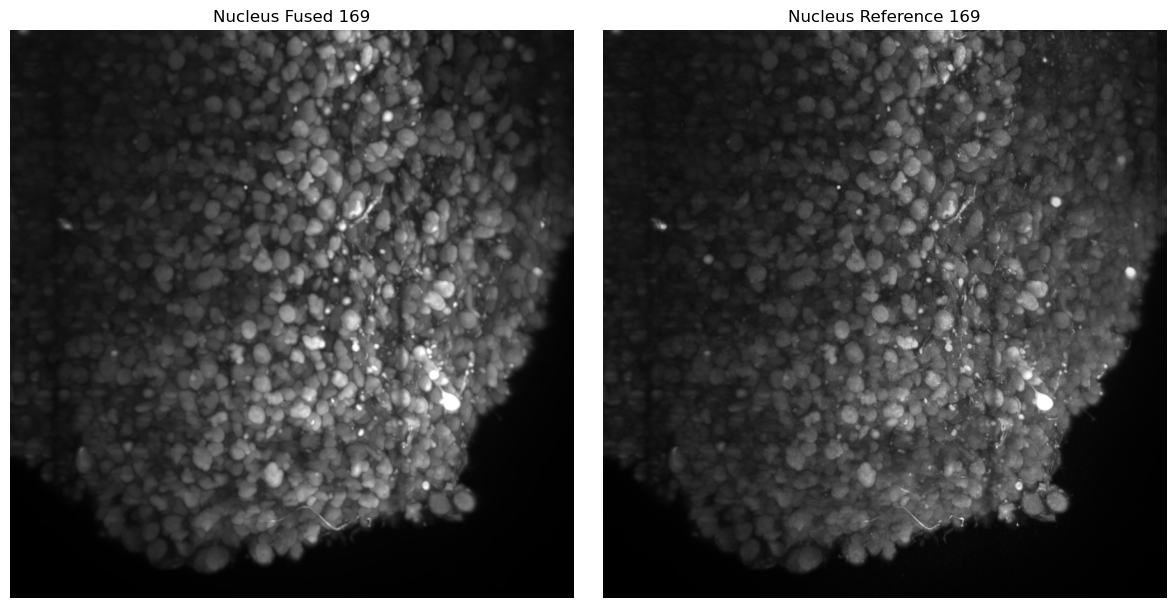


=== Processing Image 170 (nucleus) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pro

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.7068
PSNR: 22.0779 dB
MSE: 29883.9611


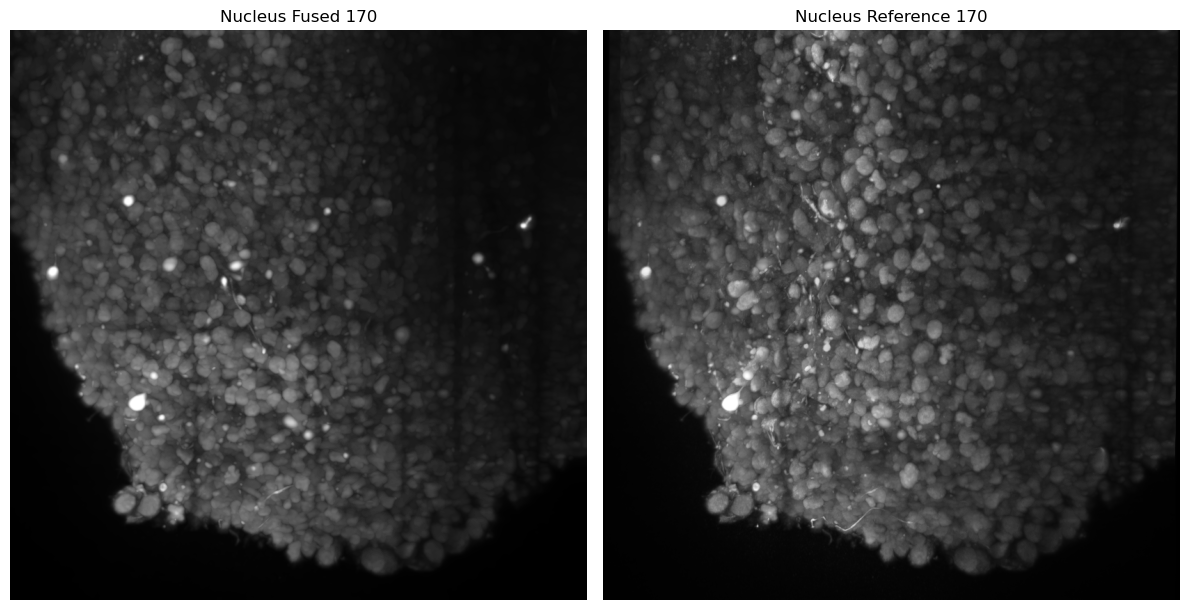


=== Processing Image 173 (nucleus) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pro

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.7748
PSNR: 22.7652 dB
MSE: 31896.8645


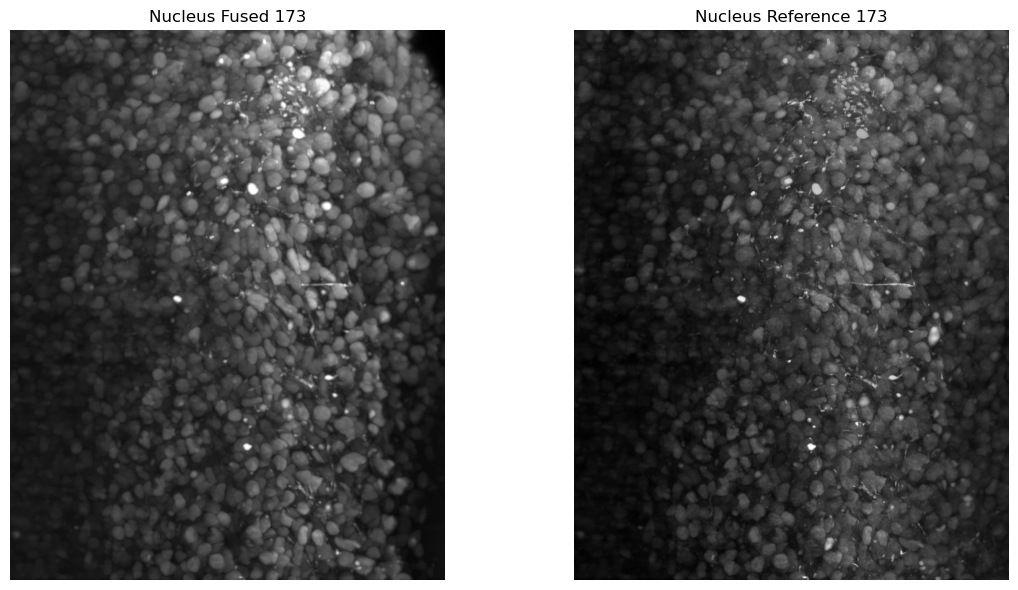


=== Processing Image 174 (nucleus) ===
Processed slice 1/887
Processed slice 2/887
Processed slice 3/887
Processed slice 4/887
Processed slice 5/887
Processed slice 6/887
Processed slice 7/887
Processed slice 8/887
Processed slice 9/887
Processed slice 10/887
Processed slice 11/887
Processed slice 12/887
Processed slice 13/887
Processed slice 14/887
Processed slice 15/887
Processed slice 16/887
Processed slice 17/887
Processed slice 18/887
Processed slice 19/887
Processed slice 20/887
Processed slice 21/887
Processed slice 22/887
Processed slice 23/887
Processed slice 24/887
Processed slice 25/887
Processed slice 26/887
Processed slice 27/887
Processed slice 28/887
Processed slice 29/887
Processed slice 30/887
Processed slice 31/887
Processed slice 32/887
Processed slice 33/887
Processed slice 34/887
Processed slice 35/887
Processed slice 36/887
Processed slice 37/887
Processed slice 38/887
Processed slice 39/887
Processed slice 40/887
Processed slice 41/887
Processed slice 42/887
Pro

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.5534
PSNR: 19.6568 dB
MSE: 32211.7491


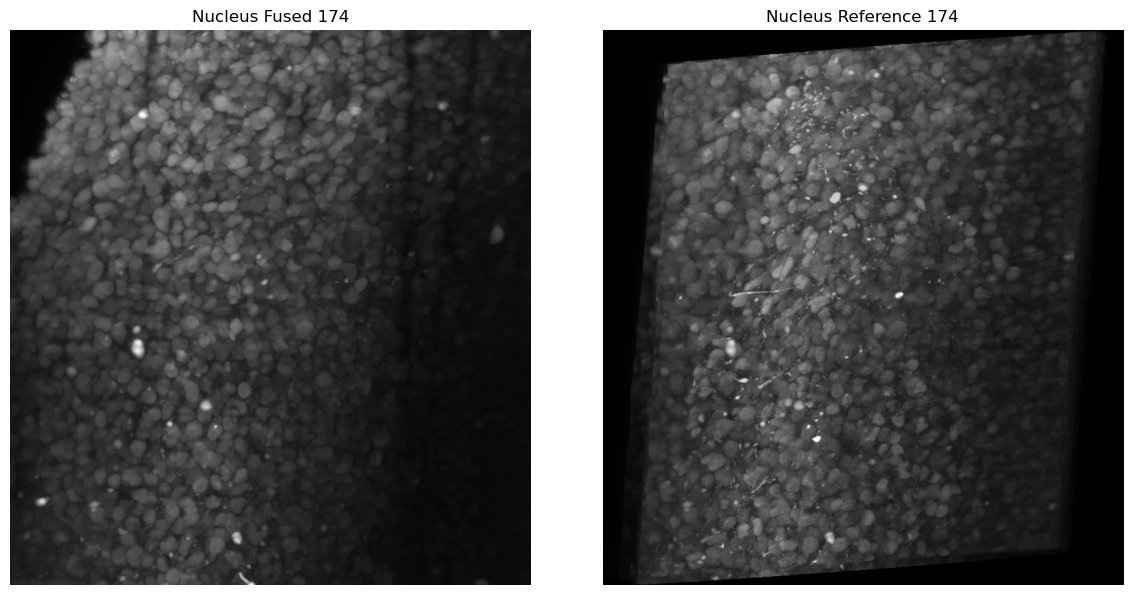


=== Processing Image 177 (nucleus) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pro

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.8657
PSNR: 25.8317 dB
MSE: 30817.6644


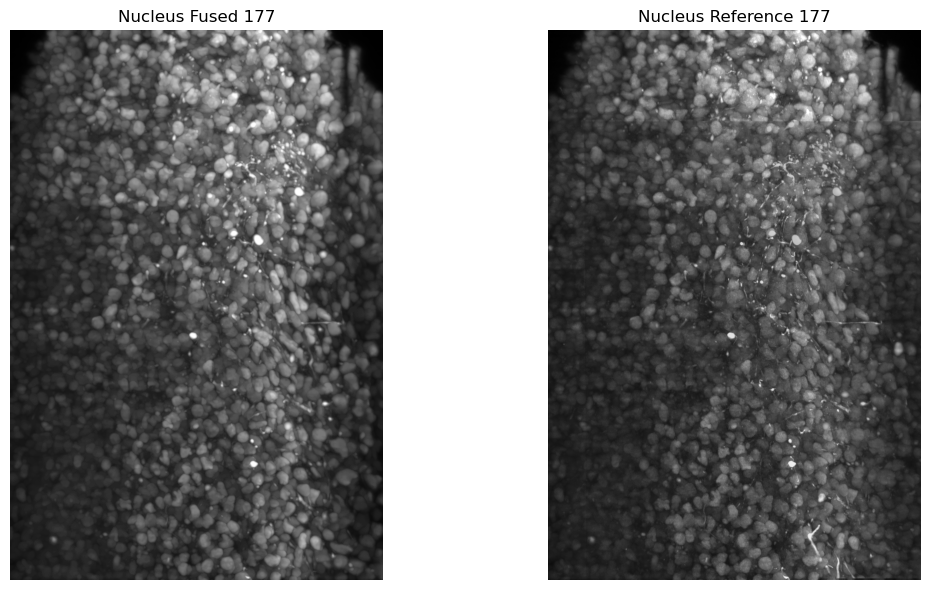


=== Processing Image 171 (membrane) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pr

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.8007
PSNR: 24.3120 dB
MSE: 22732.3559


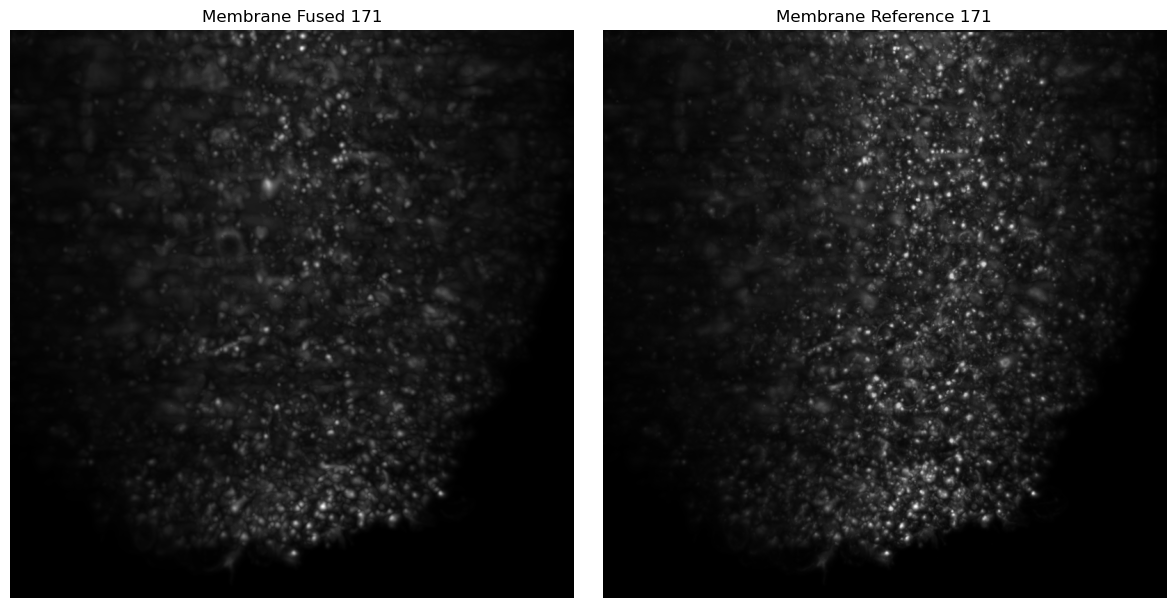


=== Processing Image 172 (membrane) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pr

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.9238
PSNR: 31.3235 dB
MSE: 24049.5986


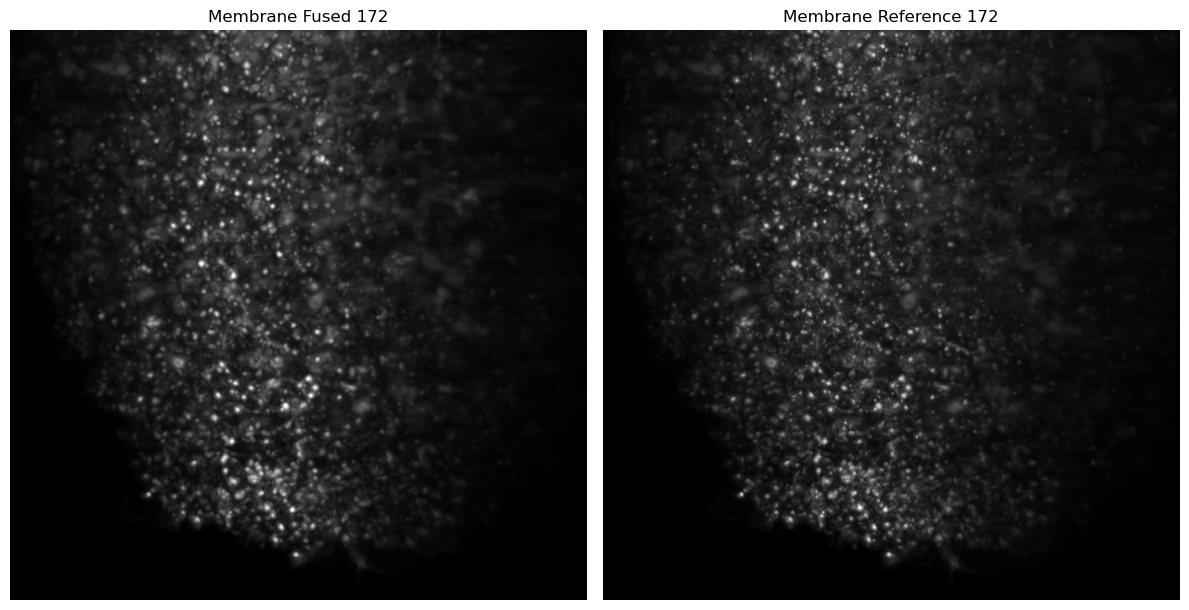


=== Processing Image 175 (membrane) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pr

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.6024
PSNR: 19.8819 dB
MSE: 31056.5735


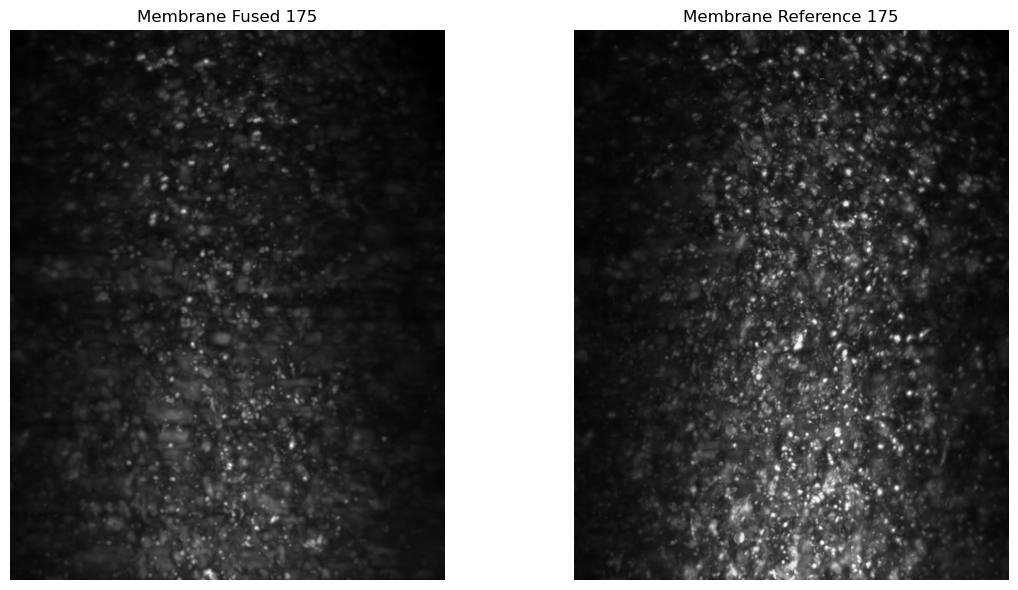


=== Processing Image 176 (membrane) ===
Processed slice 1/887
Processed slice 2/887
Processed slice 3/887
Processed slice 4/887
Processed slice 5/887
Processed slice 6/887
Processed slice 7/887
Processed slice 8/887
Processed slice 9/887
Processed slice 10/887
Processed slice 11/887
Processed slice 12/887
Processed slice 13/887
Processed slice 14/887
Processed slice 15/887
Processed slice 16/887
Processed slice 17/887
Processed slice 18/887
Processed slice 19/887
Processed slice 20/887
Processed slice 21/887
Processed slice 22/887
Processed slice 23/887
Processed slice 24/887
Processed slice 25/887
Processed slice 26/887
Processed slice 27/887
Processed slice 28/887
Processed slice 29/887
Processed slice 30/887
Processed slice 31/887
Processed slice 32/887
Processed slice 33/887
Processed slice 34/887
Processed slice 35/887
Processed slice 36/887
Processed slice 37/887
Processed slice 38/887
Processed slice 39/887
Processed slice 40/887
Processed slice 41/887
Processed slice 42/887
Pr

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.7365
PSNR: 23.4530 dB
MSE: 31596.5273


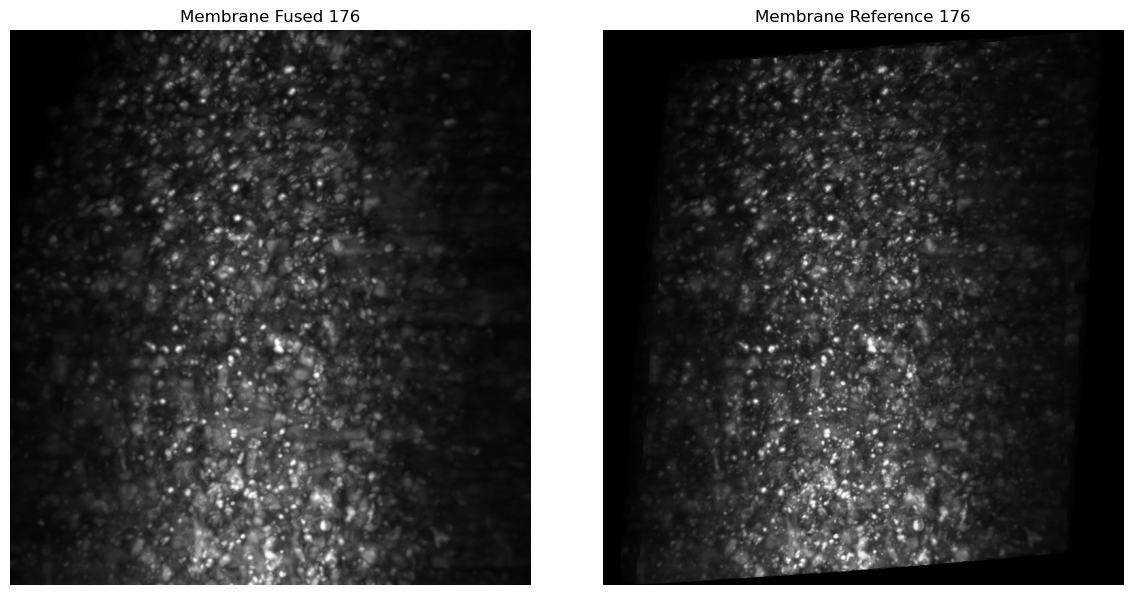


=== Processing Image 179 (membrane) ===
Processed slice 1/891
Processed slice 2/891
Processed slice 3/891
Processed slice 4/891
Processed slice 5/891
Processed slice 6/891
Processed slice 7/891
Processed slice 8/891
Processed slice 9/891
Processed slice 10/891
Processed slice 11/891
Processed slice 12/891
Processed slice 13/891
Processed slice 14/891
Processed slice 15/891
Processed slice 16/891
Processed slice 17/891
Processed slice 18/891
Processed slice 19/891
Processed slice 20/891
Processed slice 21/891
Processed slice 22/891
Processed slice 23/891
Processed slice 24/891
Processed slice 25/891
Processed slice 26/891
Processed slice 27/891
Processed slice 28/891
Processed slice 29/891
Processed slice 30/891
Processed slice 31/891
Processed slice 32/891
Processed slice 33/891
Processed slice 34/891
Processed slice 35/891
Processed slice 36/891
Processed slice 37/891
Processed slice 38/891
Processed slice 39/891
Processed slice 40/891
Processed slice 41/891
Processed slice 42/891
Pr

C:\Users\gronea\AppData\Local\Temp\ipykernel_9188\1805465477.py:2: UserWarning: Setting data_range based on im1.dtype. data_range = 65535. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(fused_image, reference_image, full=True)


SSIM: 0.7531
PSNR: 22.5052 dB
MSE: 27896.0987


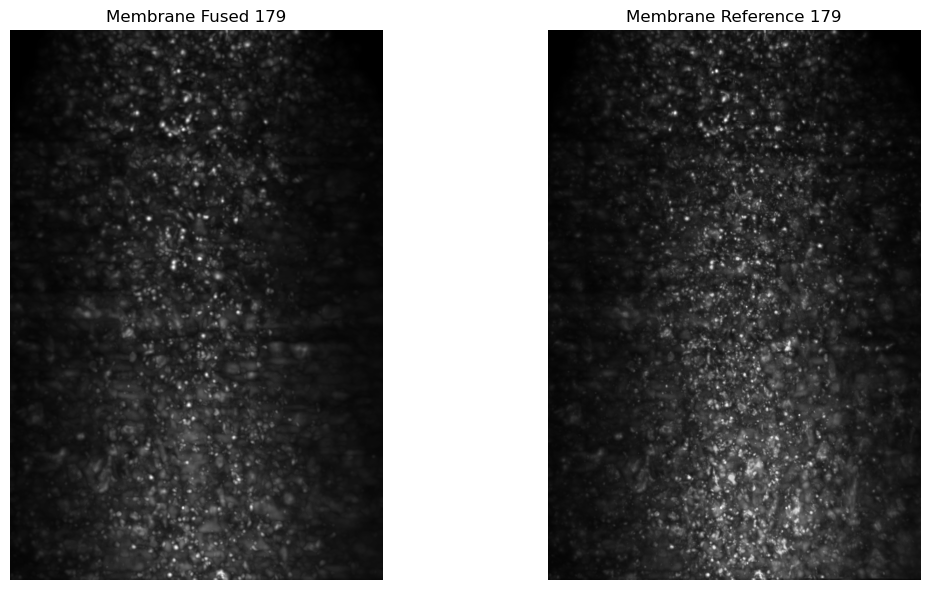

In [17]:
nucleus_ids = [169, 170, 173, 174, 177]
membrane_ids = [171, 172, 175, 176, 179]
base_dir = r"C:\Users\gronea\Box\Fuse My Cells Challenge\image_169-180"
fusion_method = 'max'

# === Processing Loop ===
for image_id in nucleus_ids + membrane_ids:
    if image_id in nucleus_ids:
        type_tag = "nucleus"
    elif image_id in membrane_ids:
        type_tag = "membrane"
    else:
        continue  # Skip unknown types

    print(f"\n=== Processing Image {image_id} ({type_tag}) ===")

    input_path = os.path.join(base_dir, f"image_{image_id}_{type_tag}_angle.tif")
    reference_path = os.path.join(base_dir, f"image_{image_id}_{type_tag}_fused.tif")

    if not os.path.exists(input_path) or not os.path.exists(reference_path):
        print(f"Missing files for image {image_id}. Skipping.")
        continue

    # Load and process
    input_stack = load_image_stack(input_path)
    reference_stack = load_image_stack(reference_path)

    denoised_stack = denoise_image_stack(input_stack)
    fused_input = fuse_stack(denoised_stack, method=fusion_method)
    fused_reference = fuse_stack(reference_stack, method=fusion_method)

    # Evaluate
    evaluation_results = evaluate_fusion(fused_input, fused_reference)

    # Visualize
    show_side_by_side(fused_input, fused_reference,
                      title1=f'{type_tag.capitalize()} Fused {image_id}',
                      title2=f'{type_tag.capitalize()} Reference {image_id}')